# Optimal Pokemon Team Selector - Pokemon (DP/Gen 4)

<br>
Pokemon are animal-like creatures that can be captured and trained to battle against other Pokemon. At the start of each game, you’re given a choice between three initial Pokemon, known as starter Pokemon. In the Diamond and Pearl games, these are Turtwig, a grass-type turtle Pokemon; Chimchar, a fire-type chimp Pokemon; and Piplup, a water-type penguin Pokemon. They and many other Pokemon can undergo a metamorphosis called evolution up to two times, allowing them to get stronger and in some cases gain an additional typing.
</br>

The three starter Pokemon in Diamond and Pearl, some brief in-game information on each of them, and their evolutions below.
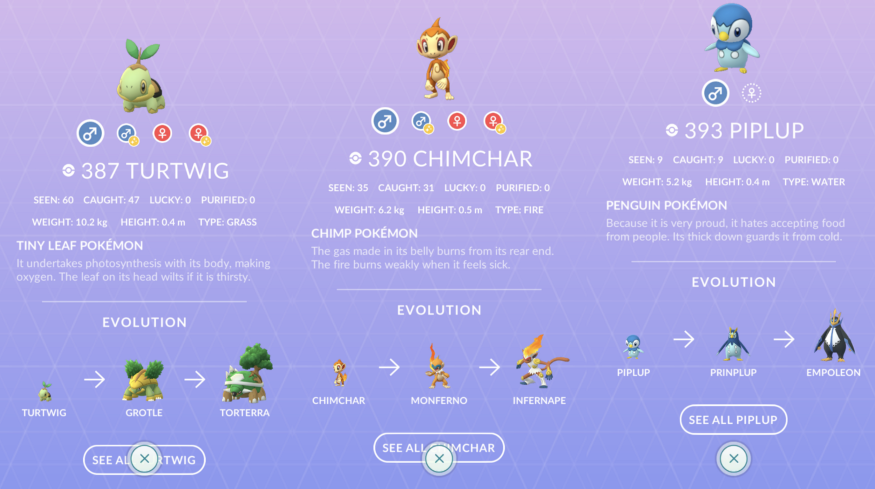

The objective of most games is to train a team of up to six Pokemon and become the strongest trainer in the region.

To achieve this goal, you must battle a series of eight bosses called gym leaders who each specialize in a specific element, or type, of Pokemon. 

<div>
    [For example, Pikachu, the Pokemon mascot, is an electric type Pokemon. This means it has a natural advantage against water type Pokemon, but a weakness to ground types. To gain the upper hand, you want to use Pokemon strong against the type you’re facing (think of it as an advanced version of rock, paper, scissors).]
</div> 
    
After you defeat all eight gym leaders, you can then face off against the Elite Four at the Pokemon League. These are considered some of the strongest trainers in the land and like gym leaders, specialize in a specific type of Pokemon. Following the Elite Four is the final boss fight against the Pokemon Champion, who are users of  a myriad of different Pokemon types and is regarded as one of the hardest boss fights in the entire series. There are 18 types and you can use up to 6 Pokemon at a time. 

**In this case, what is the best team of Pokemon you can assemble to take on these 12 trainers prior to Champion?**

# Dataset:
- https://www.kaggle.com/abcsds/pokemon - Pokemon List - All till XYZ
- https://www.kaggle.com/mrinalshankar/pokemon-types - Type Matchup

# INDEX
- Importing Libraries
-----------------------------------------------
**PART 1 - Creating Pokedex Gen IV - 206 * 13**
- Loading Data -  Pokemon List , 
- Understanding Dataset - Pokemon List
- Pre Preprocessing 
  - Renaming
  - Filtering Pokemon Based On Pokedex
  - Dropping Duplicates
  - Filtering Legendaries

**-------------------------------------------------------** 


**Part 2 - Creating Type Chart Matrix**

- Loading Dataset
- Understanding Dataset
- Pre Processing 
  - Filtering type matchups based on gym & elite 4

**-------------------------------------------------------** 

**Part 3 - Optimization**
- Understanding Optimization Problem
- Creating Vector Matrix
- Performing Optimization
    - Printing Results
    - Optmizing Results by removing mytical pokemons and pseudo legendaries

**-------------------------------------------------------** 

**Part 4 - Extras**
- Creating team based on starter choice


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from pulp import * # optimization Library

## Loading Data - Pokemon List

In [2]:
team_df = pd.read_csv("Datasets/pokemon.csv")

## Understanding Dataset

In [3]:
team_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Dataset Break Down:
-  **Dataset - team df**
<br>

- `#` -  Id of each pokemon - Replacing with name `id` in next stage.

- Name- Name Of Pokemon.

- Type 1 & Type 2- Pokemon Types - NaN if no secondary type avaliable.
    
- Total - Total Stats.

- [HP,	Attack,	Defense,Sp. Atk,Sp. Def,Speed] - Indivisual Breakdown of total stats - states how strong a pokemon abilities are.

- Generation- Genration/ Game Titles in which pokemon was introduced in like **Red-Blue, Black White, Daimond And Pearl**.

- Legendary - Legendary pokemons - rare and have very high stats. - will not consider for fairenss , hence droped in data -processing stage.

##  Pre Processing 

In [4]:
# renaming # -> Id
team_df = team_df.rename(columns= {"#" : "id"})
team_df.head()

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
# storing gen 4 pokemon index(id) from observation 387-493
gen4 = list(range(387 , 494))
# storing gen1-gen3 pokemon index from bulbapedia 
gen1_gen3 = [63, 64, 65, 129, 130, 315, 41, 42, 169, 74, 75, 76,
               95, 208, 66, 67, 68, 54, 55, 265, 266, 267, 268, 269, 
                214, 190, 92, 93, 94, 200, 198, 118, 119, 339, 340, 
                358, 307, 308, 77, 78, 185, 122, 113, 242, 173, 35, 36,
               172, 25, 26, 163, 164, 143, 201, 194, 195, 278, 279, 203,
                298, 183, 184, 223, 224, 72, 73, 349, 350, 226, 215, 207, 
                299, 280, 281, 282, 108, 133, 134, 135, 136, 196, 197,
               333, 334, 175, 176, 228, 229, 81, 82, 114, 193, 357, 111, 
                112, 355, 356, 137, 233, 123, 212, 239, 125, 240, 126, 
                220, 221, 361, 362, 359]

# checking len
len(gen1_gen3)

110

In [6]:
# storing gen1-gen3 pokemon index from bulbapedia 
gen1_gen3 = [63, 64, 65, 129, 130, 315, 41, 42, 169, 74, 75, 76,
               95, 208, 66, 67, 68, 54, 55, 265, 266, 267, 268, 269, 
                214, 190, 92, 93, 94, 200, 198, 118, 119, 339, 340, 
                358, 307, 308, 77, 78, 185, 122, 113, 242, 173, 35, 36,
               172, 25, 26, 163, 164, 143, 201, 194, 195, 278, 279, 203,
                298, 183, 184, 223, 224, 72, 73, 349, 350, 226, 215, 207, 
                299, 280, 281, 282, 108, 133, 134, 135, 136, 196, 197,
               333, 334, 175, 176, 228, 229, 81, 82, 114, 193, 357, 111, 
                112, 355, 356, 137, 233, 123, 212, 239, 125, 240, 126, 
                220, 221, 361, 362, 359]

# checking len
len(gen1_gen3)

110

In [7]:
# creating pokedex
pokedex = gen4+gen1_gen3

In [8]:
# filtering out the dataset based on pokedex till gen 4
gen4_dex =  team_df[team_df.id.isin(pokedex)]

In [9]:
gen4_dex

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
30,25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False
31,26,Raichu,Electric,NaN,485,60,90,55,90,80,110,1,False
40,35,Clefairy,Fairy,NaN,323,70,45,48,60,65,35,1,False
41,36,Clefable,Fairy,NaN,483,95,70,73,95,90,60,1,False
46,41,Zubat,Poison,Flying,245,40,45,35,30,40,55,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,490,Manaphy,Water,NaN,600,100,100,100,100,100,100,4,False
549,491,Darkrai,Dark,NaN,600,70,90,90,135,90,125,4,True
550,492,ShayminLand Forme,Grass,NaN,600,100,100,100,100,100,100,4,True
551,492,ShayminSky Forme,Grass,Flying,600,100,103,75,120,75,127,4,True


In [10]:
len(gen4_dex)

243

In [11]:
# removing dupilacates like id -550,551 - Shaymin forms 
gen4_dex= gen4_dex.drop_duplicates(subset = ['id'])
gen4_dex

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
30,25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False
31,26,Raichu,Electric,NaN,485,60,90,55,90,80,110,1,False
40,35,Clefairy,Fairy,NaN,323,70,45,48,60,65,35,1,False
41,36,Clefable,Fairy,NaN,483,95,70,73,95,90,60,1,False
46,41,Zubat,Poison,Flying,245,40,45,35,30,40,55,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,489,Phione,Water,NaN,480,80,80,80,80,80,80,4,False
548,490,Manaphy,Water,NaN,600,100,100,100,100,100,100,4,False
549,491,Darkrai,Dark,NaN,600,70,90,90,135,90,125,4,True
550,492,ShayminLand Forme,Grass,NaN,600,100,100,100,100,100,100,4,True


In [12]:
# removing Legendary pokemon for fairness - just filtering non legendaries
gen4_dex = gen4_dex[gen4_dex.Legendary == False]
gen4_dex

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
30,25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False
31,26,Raichu,Electric,NaN,485,60,90,55,90,80,110,1,False
40,35,Clefairy,Fairy,NaN,323,70,45,48,60,65,35,1,False
41,36,Clefable,Fairy,NaN,483,95,70,73,95,90,60,1,False
46,41,Zubat,Poison,Flying,245,40,45,35,30,40,55,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,478,Froslass,Ice,Ghost,480,70,80,70,80,70,110,4,False
531,479,Rotom,Electric,Ghost,440,50,50,77,95,77,91,4,False
546,488,Cresselia,Psychic,NaN,600,120,70,120,75,130,85,4,False
547,489,Phione,Water,NaN,480,80,80,80,80,80,80,4,False


**-----------------------------------------------------------------------------------------------------------------**

# Creating Type Chart Matrix

In [13]:
# loading dataset- type_chart
type_chart = pd.read_csv("Datasets/pkmn_type_chart.csv" , index_col=[0])

## Understanding Dataset

In [14]:
type_chart

,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
Normal,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,0.5,1.0
Fire,1.0,0.5,0.5,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,0.5,1.0,2.0,1.0
Water,1.0,2.0,0.5,1.0,0.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0
Electric,1.0,1.0,2.0,0.5,0.5,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
Grass,1.0,0.5,2.0,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,0.5,2.0,1.0,0.5,1.0,0.5,1.0
Ice,1.0,0.5,0.5,1.0,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0
Fighting,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,0.5,0.5,0.5,2.0,0.0,1.0,2.0,2.0,0.5
Poison,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0
Ground,1.0,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,0.0,1.0,0.5,2.0,1.0,1.0,1.0,2.0,1.0
Flying,1.0,1.0,1.0,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,0.5,1.0


### Dataset Break Down:
-  **Dataset - type_chart**

* Basics
    - Row - Repersents the pokemon type we are using
    - Column - Repersents the opposing pokemon_type

Values - Effect on type matchups
- 0.0 - Has no effect in type matchups - ex: pikachu(electric) vs geodude(ground)
- 0.5 - Not so effective - ex: pikachu(electric) vs Dragonite(dragon) 
- 1.0 - Effective/ Neutral Damange Ex: pikachu(electric) vs charmander(fire) 
- 2.0 - Super Effective  Ex: pikachu(electric) vs  starmie (water)

**exception : pikachu defeated dragonite in orange cup/league, but we are leaving the anime/manga.Also used pikchau as it is pokemon mascot**

## Pre Processing - Type Matrix
---
Filtering `type_chart` based on type of pokemon used by gym leaders & Elite Fours

In [15]:
# storing types for reference
pkmn_types = ['Rock', 'Grass', 'Fighting', 'Water', 'Ghost', 'Steel',
         'Ice', 'Electric', 'Bug', 'Ground', 'Fire', 'Psychic'] # more can be included in later gen



In [16]:
# filtering  
gym_elite_four = type_chart[[c for c in type_chart.columns if c in pkmn_types]]
gym_elite_four

,Fire,Water,Electric,Grass,Ice,Fighting,Ground,Psychic,Bug,Rock,Ghost,Steel
Normal,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,0.5
Fire,0.5,0.5,1.0,2.0,2.0,1.0,1.0,1.0,2.0,0.5,1.0,2.0
Water,2.0,0.5,1.0,0.5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0
Electric,1.0,2.0,0.5,0.5,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Grass,0.5,2.0,1.0,0.5,1.0,1.0,2.0,1.0,0.5,2.0,1.0,0.5
Ice,0.5,0.5,1.0,2.0,0.5,1.0,2.0,1.0,1.0,1.0,1.0,0.5
Fighting,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.5,0.5,2.0,0.0,2.0
Poison,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,0.5,0.5,0.0
Ground,2.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,0.5,2.0,1.0,2.0
Flying,1.0,1.0,0.5,2.0,1.0,2.0,1.0,1.0,2.0,0.5,1.0,0.5


**----------------------------------------------------------------------------------------------------------------------------**

# Optimization

## Understanding Optimization Problem
Objective: 

Need Team Of 6 Pokemons Whose Type Are Super Effective Then The Gym Leaders And Elite Fours Under Following Constraints
- Must Have A Starter Pokemon And Their Evolutions(S)
- No Legendary or Mythical Pokemond (C, S) # upto gen4
- Pokemon must be on team (P[i])


With all these rules applied the problem in hand becomes an optimization problem as :

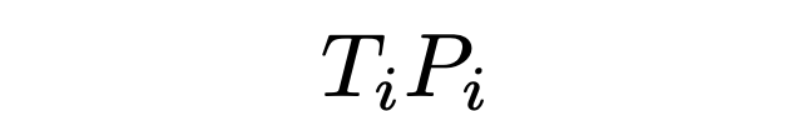

With Constraints

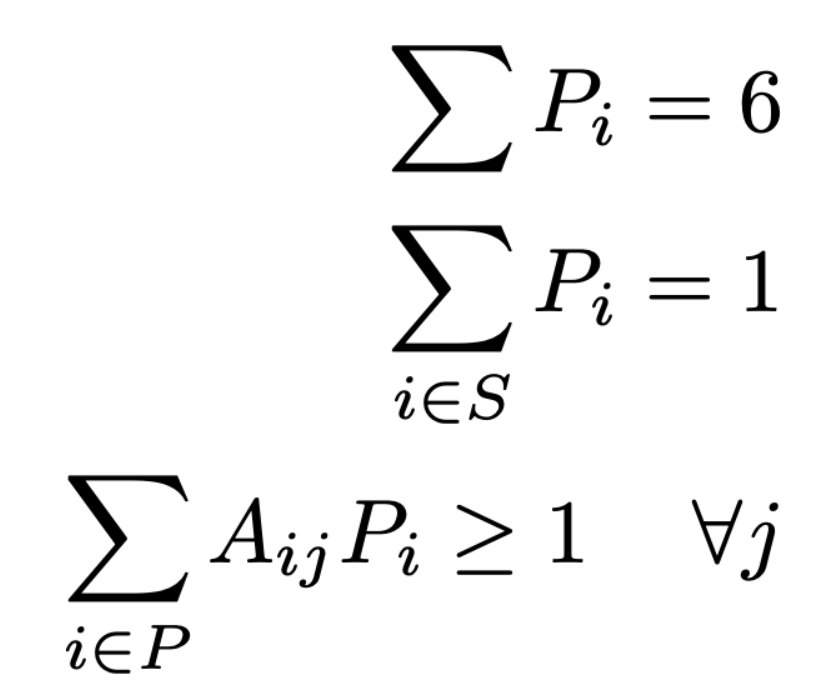

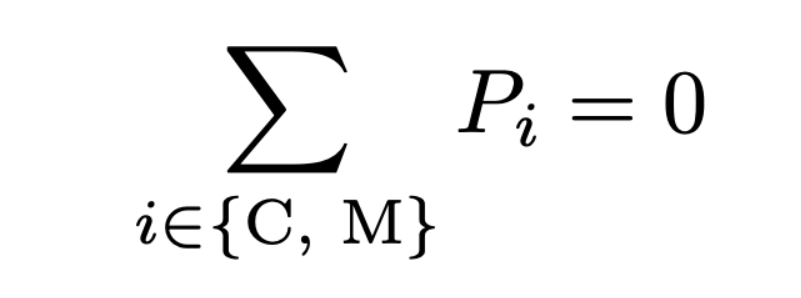



Where:
- T - Total Stats of Pokemon at **i**th pos - (total column in gen4_dex)
- P[i] -   Decision variavble to decide if pokemon[i] is on team or not
- S - Set of starter pokemon
- A[i][j] - Binary matrix for type effec **if pokemon@(ith) pos effective against pokemon@(jth) pos then 1 else 0**


- P[i] = 6 - Total no of pokemon 6
- P[i] = 1 , i belongs to S - One Pokemon As Starter
-  C & M - Refefers to Cresalia and Manaphy whose use are to be restricted




All we need is to maximize the total stats under following contraints - Cost fn - Similar to Gradient Decent which can be solved using linear programing (`plup`)

In [17]:
# changing Types 1 to Type to insure no error 
#while iterating using pandas
gen4_dex = gen4_dex.rename(columns= {"Type 1" : "Type1"})
gen4_dex = gen4_dex.rename(columns= {"Type 2" : "Type2"})

In [18]:
gen4_dex

,id,Name,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
30,25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False
31,26,Raichu,Electric,NaN,485,60,90,55,90,80,110,1,False
40,35,Clefairy,Fairy,NaN,323,70,45,48,60,65,35,1,False
41,36,Clefable,Fairy,NaN,483,95,70,73,95,90,60,1,False
46,41,Zubat,Poison,Flying,245,40,45,35,30,40,55,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,478,Froslass,Ice,Ghost,480,70,80,70,80,70,110,4,False
531,479,Rotom,Electric,Ghost,440,50,50,77,95,77,91,4,False
546,488,Cresselia,Psychic,NaN,600,120,70,120,75,130,85,4,False
547,489,Phione,Water,NaN,480,80,80,80,80,80,80,4,False


In [19]:
# creating list to store req variable
ids = [] # contains the id of each pokemon
names = [] # list containg all the pokemon names
total_stats = []  # total stats/ total column of pokemon dataset
effective_type =[] # store pokemon type which are effective agaist the opponents pokemon

# iterating through entire data to store different variables
i = 0 # counter/ iterator
for row in gen4_dex.itertuples(index=True, name='Pandas'):
    ids.append(row.id)
    names.append(row.Name)
    
    # Check what types the Pokemon is strong against
    effective_type.append([1 if s >= 2.0 else 0 for s in list(gym_elite_four.loc[row.Type1])])
    total_stats.append(row.Total)
    
    # checking for type 2 for additional typings(advantage) 
    try:
        effective_type[i] = list(np.add(effective_type[i], 
                                        [1 if s >= 2.0 else 0 
                                         for s in list(gym_elite_four.loc[row.Type2])]))
        
    except:
        KeyError
        
    i += 1
    
# Equals 1 if the Pokemon is strong against the type indicated; 0 otherwise 
#--> 206 by 18 matrix # Aij
advantage = [[1 if r >= 1 else 0 for r in effective_type[i]] for i in range(206)]

# Create the set of starter Pokemon
starterNames = ['Turtwig', 'Grotle', 'Torterra', 
                'Chimchar', 'Monferno', 'Infernape',
               'Piplup', 'Prinplup', 'Empoleon']

starter_idx = []
for pkmn in starterNames:
    starter_idx.append(names.index(pkmn))
    
# creating mythyical indices list to later include the constraints
mythical_names = ['Cresselia', 'Manaphy'] # list of names 

# using names to find the index of pokemon and adding mythical index
mythical_idx = []

for i in mythical_names:
    mythical_idx.append(names.index(i))


In [20]:
starter_idx

[110, 111, 112, 113, 114, 115, 116, 117, 118]

## Creating Model

In [22]:
!pip install pulp

In [23]:
# import everthying from plup
from pulp import *

# define model name and objective end goal - max/min
best_team = LpProblem("optimal_team", LpMaximize)

# defining a sparce matrix for pokemon i.e mask with 0 & 1s which will be later populated
Pokemon = LpVariable.dicts("Pokemon", range(206), cat=LpBinary) # 206 pokemon to consider

# defining the objective fn to maximize - defined earlier
# Ti Pi
best_team += lpSum([total_stats[pkmn] * Pokemon[pkmn] 
                    for pkmn in range(206)])

# adding contraint that we need only 6 pokemon on team(pi = 6)
best_team += lpSum([Pokemon[pkmn] for pkmn in range(206)]) == 6

# adding 2nd constraint that out team should have one starter pokemon(S)
best_team += lpSum([Pokemon[pkmn] for pkmn in starter_idx]) == 1

# adding contraints that we can't use mythical pokemon(C,M)
best_team += lpSum([Pokemon[pkmn] for pkmn in mythical_idx]) == 0

# adding contraint that team should have 
#atleast one pokemon which has type advantage against
#one of the Gym leader/Elite Four
for i in range(12):
    best_team += lpSum([advantage[pkmn][i] * Pokemon[pkmn] 
                        for pkmn in range(206)]) >=1
    
# finding the soltution
best_team.solve()

1

In [24]:
# printing out results - > Best 6 pokemons 
for i in range(206):
    if Pokemon[i].value() == 1:
        print(names[i])

Gyarados
Infernape
Garchomp
Electivire
Togekiss
Dusknoir


Now we have a more balanced team in terms of both stats and types with:
- Gyarados (water+flying),
- Infernape (fire+fighting), 
- Garchomp (dragon+ground), 
- Electivire (electric), 
- Togekiss (fairy+flying).
- Dusknoir (ghost)

# Extras

This section covers how to use own startes and create an effective team around that!
The previous part is optimal for any type but this is
for those who are affinated towards a specific type and want them as a starters

Logic:
- create each of stater index, (Piplup - penguin)
- then use set difference to remove the other stater which are in starter_idx and 
- finally include constraints that no other starter can be used and the stater we wish must me included


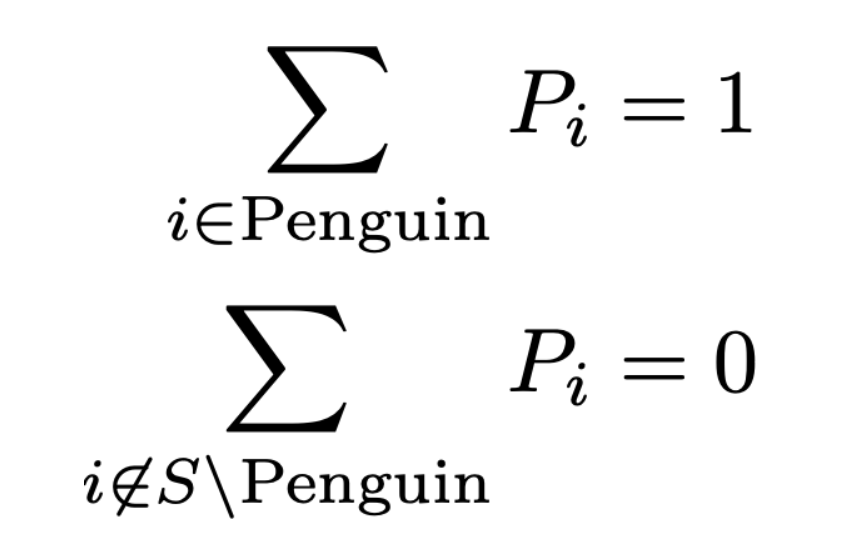

In [25]:
# Storing starter index -> full evolution chain
water_starters = [116, 117, 118] 
grass_starters = [110,111,112] 
fire_starters = [113,114,115]

In [26]:
# creating a list of non stater_types using set diffrence
not_water_starters = list(set(starter_idx)- set(water_starters))

not_fire_starters = list(set(starter_idx)- set(fire_starters))

not_grass_starters = list(set(starter_idx)- set(grass_starters))

In [27]:
# complements quick verify
print("Not water staters: ",not_water_starters)
print("Not fire staters: ",not_fire_starters)
print("Not grass staters: ",not_grass_starters)

Not water staters:  [110, 111, 112, 113, 114, 115]
Not fire staters:  [110, 111, 112, 116, 117, 118]
Not grass staters:  [113, 114, 115, 116, 117, 118]


In [42]:
# # Intialize problem using name and objective
best_team = LpProblem("optimal_team", LpMaximize)

# defining a sparce matrix for pokemon i.e mask with 0 & 1s which will be later populated
Pokemon = LpVariable.dicts("Pokemon", range(206), cat=LpBinary) # 206 pokemon to consider

# defining the objective fn to maximize TiPi
best_team += lpSum([total_stats[pkmn] * Pokemon[pkmn] for pkmn in range(206)])

# adding contraint that we need only 6 pokemon on team
best_team += lpSum([Pokemon[pkmn] for pkmn in range(206)]) == 6


# constraint that we cant have mythical and pseudo legendary pokemons
best_team += lpSum([Pokemon[pkmn] for pkmn in mythical_idx]) == 0

# need alteast 1 user defined stater - here water
best_team += lpSum([Pokemon[pkmn] for pkmn in water_starters]) == 1

# No other staters  
best_team += lpSum([Pokemon[pkmn] for pkmn in not_water_starters]) == 0    


# adding contraint that team should have atleast one pokemon which has type 
# advantage against one of the Gym leader/Elite Four
for i in range(12):
    best_team += lpSum([advantage[pkmn][i] * Pokemon[pkmn] for pkmn in range(206)]) >=1
    
    
# finding the soltution
best_team.solve()

1

In [43]:
for i in range(206):
    if Pokemon[i].value() == 1:
        print(names[i])

Snorlax
Umbreon
Empoleon
Garchomp
Electivire
Togekiss


# Tutorial - must have desired pokemon

In [44]:
def index_finder(desired_name, name_list):
    # iterate throught the name_list
    idx = []
    for i in desired_name:
        idx.append(names.index((i)))
    return idx

In [93]:
desired_idx = index_finder(["Pikachu", "Altaria", "Rotom", "Milotic"], names)
desired_idx

[0, 98, 202, 102]

In [94]:
# define model name and objective end goal - max/min
best_team = LpProblem("optimal_team", LpMaximize)

# defining a sparce matrix for pokemon i.e mask with 0 & 1s which will be later populated
Pokemon = LpVariable.dicts("Pokemon", range(206), cat=LpBinary) # 206 pokemin to consider

# defining the objective fn to maximize - defined earlier
best_team += lpSum([total_stats[pkmn] * Pokemon[pkmn] for pkmn in range(206)])

# adding contraint that we need only 6 pokemon on team
best_team += lpSum([Pokemon[pkmn] for pkmn in range(206)]) == 6


# constraint that we cant have mythical and pseudo legendary pokemons
best_team += lpSum([Pokemon[pkmn] for pkmn in mythical_idx]) == 0

# must have desired one
best_team += lpSum([Pokemon[pkmn] for pkmn in desired_idx]) == 1

# adding contraint that team should have atleast one pokemon which has type advantage against one of the Gym leader/Elite Four
for i in range(12):
    best_team += lpSum([advantage[pkmn][i] * Pokemon[pkmn] for pkmn in range(206)]) >=1

    
# adding 2nd constraint that out team should have one starter pokemon 
best_team += lpSum([Pokemon[pkmn] for pkmn in fire_starters]) == 1


# adding contraints that we can't use other starters
best_team += lpSum([Pokemon[pkmn] for pkmn in not_fire_starters]) == 0    
    
    
# finding the soltution
best_team.solve()

1

In [95]:
for i in range(206):
    if Pokemon[i].value() == 1:
        print(names[i])

Milotic
Infernape
Garchomp
Electivire
Togekiss
Dusknoir
